In [1]:
using BenchmarkTools
using PyPlot

In [13]:
include("qt.jl")
include("qo.jl")
include("simple.jl")
include("opt.jl")

Main.OPTTest

In [3]:
function get_motion_data(M)
    p = M.motion_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 50)
    sol = M.psolve(p, range(0, 4 * π / (2π * 0.13), 2001))
    return M.pexpect(p, sol)
end
function get_motion2_data(M)
    p = M.motion2_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 50)
    sol = M.psolve(p, range(0, 4 * π / (2π * 0.13), 2001))
    return M.pexpect(p, sol)
end

get_motion2_data (generic function with 1 method)

In [4]:
function test_motion(M)
    println(M)
    println("n=10")
    p = M.motion_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 10)
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2)))
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2001)))
    p = M.motion2_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 10)
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2)))
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2001)))
    println("n=50")
    p = M.motion_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 50)
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2)))
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2001)))
    p = M.motion2_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 50)
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2)))
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2001)))
    println("n=250")
    p = M.motion_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 250)
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2)))
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2001)))
    p = M.motion2_problem(2π * 0.13, 2π * 0.032, 0.0, 0.0, 250)
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2)))
    @btime $(M.psolve)($(p), $(range(0, 4 * π / (2π * 0.13), 2001)))
    return
end

test_motion (generic function with 1 method)

In [5]:
test_motion(QTTest)

Main.QTTest
n=10
  2.087 ms (161 allocations: 752.37 KiB)
  3.260 ms (8171 allocations: 13.31 MiB)
  2.053 ms (161 allocations: 752.37 KiB)
  3.211 ms (8171 allocations: 13.31 MiB)
n=50
  130.885 ms (164 allocations: 55.31 MiB)
  160.291 ms (8174 allocations: 360.71 MiB)
  129.975 ms (164 allocations: 55.31 MiB)
  159.516 ms (8174 allocations: 360.71 MiB)
n=250
  14.563 s (173 allocations: 2.20 GiB)
  16.384 s (8183 allocations: 9.65 GiB)
  14.724 s (173 allocations: 2.20 GiB)
  16.063 s (8183 allocations: 9.65 GiB)


In [6]:
test_motion(QOTest)

Main.QOTest
n=10
  2.323 ms (207 allocations: 140.16 KiB)
  3.649 ms (8223 allocations: 12.86 MiB)
  1.367 ms (203 allocations: 140.91 KiB)
  2.586 ms (8219 allocations: 12.86 MiB)
n=50
  166.155 ms (208 allocations: 3.17 MiB)
  195.841 ms (8224 allocations: 308.72 MiB)
  96.686 ms (203 allocations: 3.21 MiB)
  126.014 ms (8219 allocations: 308.76 MiB)
n=250
  11.885 s (209 allocations: 77.16 MiB)
  13.357 s (8225 allocations: 7.52 GiB)
  3.247 s (203 allocations: 80.12 MiB)
  4.813 s (8219 allocations: 7.53 GiB)


In [7]:
test_motion(SimpleTest)

Main.SimpleTest
n=10
  1.360 ms (101 allocations: 110.68 KiB)
  2.592 ms (6118 allocations: 12.59 MiB)
  1.362 ms (101 allocations: 110.68 KiB)
  2.568 ms (6118 allocations: 12.59 MiB)
n=50
  96.652 ms (101 allocations: 2.60 MiB)
  125.575 ms (6118 allocations: 307.90 MiB)
  96.622 ms (101 allocations: 2.60 MiB)
  125.513 ms (6118 allocations: 307.90 MiB)
n=250
  4.776 s (101 allocations: 64.85 MiB)
  6.582 s (6118 allocations: 7.51 GiB)
  4.795 s (101 allocations: 64.85 MiB)
  6.441 s (6118 allocations: 7.51 GiB)


In [8]:
test_motion(OPTTest)

Main.OPTTest
n=10
  816.250 μs (101 allocations: 110.68 KiB)
  2.074 ms (6118 allocations: 12.59 MiB)
  815.541 μs (101 allocations: 110.68 KiB)
  2.073 ms (6118 allocations: 12.59 MiB)
n=50
  51.689 ms (101 allocations: 2.60 MiB)
  79.183 ms (6118 allocations: 307.90 MiB)
  51.676 ms (101 allocations: 2.60 MiB)
  79.294 ms (6118 allocations: 307.90 MiB)
n=250
  2.759 s (101 allocations: 64.85 MiB)
  5.048 s (6118 allocations: 7.51 GiB)
  2.768 s (101 allocations: 64.85 MiB)
  4.831 s (6118 allocations: 7.51 GiB)


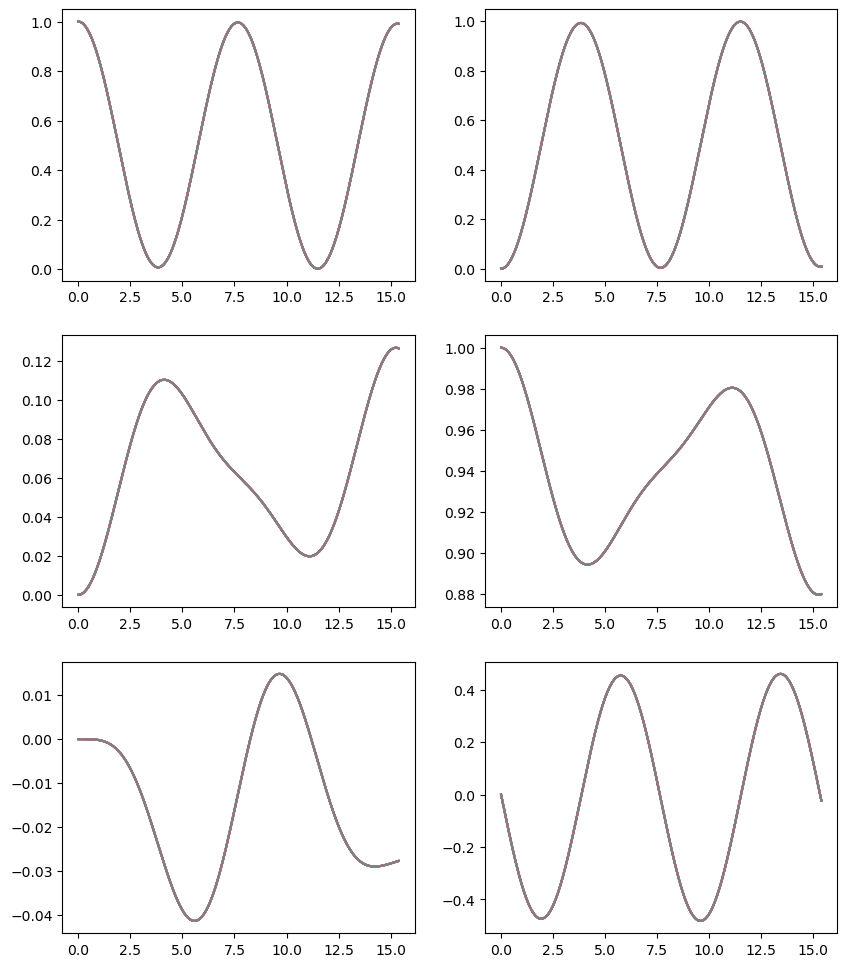

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffe975e5090>

In [14]:
data_qt = get_motion_data(QTTest)
data_qo = get_motion_data(QOTest)
data_simple = get_motion_data(SimpleTest)
data_opt = get_motion_data(OPTTest)
data2_qt = get_motion2_data(QTTest)
data2_qo = get_motion2_data(QOTest)
data2_simple = get_motion2_data(SimpleTest)
data2_opt = get_motion2_data(OPTTest)

figure(figsize=[10, 12])
subplot(3, 2, 1)
plot(data_qt[1], data_qt[2])
plot(data_qo[1], data_qo[2])
plot(data_simple[1], data_simple[2])
plot(data_opt[1], data_opt[2])
plot(data2_qt[1], data2_qt[2])
plot(data2_qo[1], data2_qo[2])
plot(data2_simple[1], data2_simple[2])
plot(data2_opt[1], data2_opt[2])

subplot(3, 2, 2)
plot(data_qt[1], data_qt[3])
plot(data_qo[1], data_qo[3])
plot(data_simple[1], data_simple[3])
plot(data_opt[1], data_opt[3])
plot(data2_qt[1], data2_qt[3])
plot(data2_qo[1], data2_qo[3])
plot(data2_simple[1], data2_simple[3])
plot(data2_opt[1], data2_opt[3])

subplot(3, 2, 3)
plot(data_qt[1], data_qt[4])
plot(data_qo[1], data_qo[4])
plot(data_simple[1], data_simple[4])
plot(data_opt[1], data_opt[4])
plot(data2_qt[1], data2_qt[4])
plot(data2_qo[1], data2_qo[4])
plot(data2_simple[1], data2_simple[4])
plot(data2_opt[1], data2_opt[4])

subplot(3, 2, 4)
plot(data_qt[1], data_qt[5])
plot(data_qo[1], data_qo[5])
plot(data_simple[1], data_simple[5])
plot(data_opt[1], data_opt[5])
plot(data2_qt[1], data2_qt[5])
plot(data2_qo[1], data2_qo[5])
plot(data2_simple[1], data2_simple[5])
plot(data2_opt[1], data2_opt[5])

subplot(3, 2, 5)
plot(data_qt[1], data_qt[6])
plot(data_qo[1], data_qo[6])
plot(data_simple[1], data_simple[6])
plot(data_opt[1], data_opt[6])
plot(data2_qt[1], data2_qt[6])
plot(data2_qo[1], data2_qo[6])
plot(data2_simple[1], data2_simple[6])
plot(data2_opt[1], data2_opt[6])

subplot(3, 2, 6)
plot(data_qt[1], data_qt[7])
plot(data_qo[1], data_qo[7])
plot(data_simple[1], data_simple[7])
plot(data_opt[1], data_opt[7])
plot(data2_qt[1], data2_qt[7])
plot(data2_qo[1], data2_qo[7])
plot(data2_simple[1], data2_simple[7])
plot(data2_opt[1], data2_opt[7])